<a href="https://colab.research.google.com/github/yifan-zhou19/iso/blob/master/iso_embedding_(ast_sourcecode_cfg_10classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from os.path import exists

if not exists('ast.zip'):
    !wget -O ast.zip https://raw.githubusercontent.com/yifan-zhou19/iso/master/AST.zip
    !unzip ast.zip
if not exists('cfg.zip'):
    !wget -O cfg.zip https://raw.githubusercontent.com/yifan-zhou19/iso/master/CFG.zip
    !unzip cfg.zip

 **Extract Data**

In [0]:
import os.path
import re
source_code={15:'CWE15_ast',23:'CWE23_ast',36:'CWE36_ast',78:'CWE78_ast',80:'CWE80_ast',89:'CWE89_ast',90:'CWE90_ast',113:'CWE113_ast',134:'CWE134_ast',190:'CWE190_ast'}

def eachFile(filepath):
  pathDir =  os.listdir(filepath)
  files = []
  for allDir in pathDir:
    child = os.path.join('%s/%s' % (filepath, allDir))
    
    files.append(child)
  return files
root_dir_ast = './AST/' # refer root dir
files15 = eachFile(root_dir_ast+source_code[15])
files23 = eachFile(root_dir_ast+source_code[23])
files36 = eachFile(root_dir_ast+source_code[36])
files78 = eachFile(root_dir_ast+source_code[78])
files80 = eachFile(root_dir_ast+source_code[80])
files89 = eachFile(root_dir_ast+source_code[89])
files90 = eachFile(root_dir_ast+source_code[90])
files113 = eachFile(root_dir_ast+source_code[113])
files134 = eachFile(root_dir_ast+source_code[134])
files190 = eachFile(root_dir_ast+source_code[190])
files=files15[:700]+files23[:700]+files36[:700]+files78[:700]+files80[:700]+files89[:700]+files90[:700]+files113[:700]+files134[:700]+files190[:700]
labels=[0]*700+[1]*700+[2]*700+[3]*700+[4]*700+[5]*700+[6]*700+[7]*700+[8]*700+[9]*700

cfg={15:'CWE15_cfg',23:'CWE23_cfg',36:'CWE36_cfg',78:'CWE78_cfg',80:'CWE80_cfg',89:'CWE89_cfg',90:'CWE90_cfg',113:'CWE113_cfg',134:'CWE134_cfg',190:'CWE190_cfg'}

root_dir_cfg = './CFG/' # refer root dir
files15_cfg = eachFile(root_dir_cfg+cfg[15])
files23_cfg = eachFile(root_dir_cfg+cfg[23])
files36_cfg = eachFile(root_dir_cfg+cfg[36])
files78_cfg = eachFile(root_dir_cfg+cfg[78])
files80_cfg = eachFile(root_dir_cfg+cfg[80])
files89_cfg = eachFile(root_dir_cfg+cfg[89])
files90_cfg = eachFile(root_dir_cfg+cfg[90])
files113_cfg = eachFile(root_dir_cfg+cfg[113])
files134_cfg = eachFile(root_dir_cfg+cfg[134])
files190_cfg = eachFile(root_dir_cfg+cfg[190])
files_cfg=files15_cfg[:700]+files23_cfg[:700]+files36_cfg[:700]+files78_cfg[:700]+files80_cfg[:700]+files89_cfg[:700]+files90_cfg[:700]+files113_cfg[:700]+files134_cfg[:700]+files190_cfg[:700]

labels_cfg=[0]*700+[1]*700+[2]*700+[3]*700+[4]*700+[5]*700+[6]*700+[7]*700+[8]*700+[9]*700

In [8]:
def extract_ast_edges(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\bn(\w+)(\s*)-(\S+)(\s*)n(\w+)\b',line)
      if result != None:
         results.append((result.group(1),result.group(5)))
    return results
def extract_source_code(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\b(n\w+)(\s+\[label=")([\w:\s\S]+)\b',line)
      if result != None:
         results.append(result.group(3))
    return results
print(extract_ast_edges(files[1]))
print(extract_source_code(files[1]))

def extract_cfg_edges(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\bv(\w+)(\s*)-(\S+)(\s*)v(\w+)\b',line)
      if result != None:
         results.append((result.group(1),result.group(5)))
    return results
def extract_cfg(file):
  results = []
  with open(file, "r") as f:
    for line in f.readlines()[2:]:
      #print(line)
      result = re.search(r'\b(v\w+)(\s+\[label=")([\w:\s\S]+)\b',line)
      if result != None:
         results.append(result.group(3))
    return results
print(extract_cfg_edges(files_cfg[0]))
print(extract_cfg(files_cfg[0]))

[('1', '2'), ('1', '3'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '7'), ('1', '8'), ('8', '9'), ('8', '10'), ('8', '11'), ('8', '12'), ('12', '13'), ('12', '14'), ('12', '15'), ('12', '16'), ('16', '17'), ('17', '18'), ('17', '19'), ('12', '20'), ('20', '21'), ('21', '22'), ('21', '23'), ('21', '24'), ('20', '25'), ('25', '26'), ('26', '27'), ('26', '28'), ('25', '29'), ('29', '30'), ('29', '31'), ('29', '32'), ('32', '33'), ('25', '34'), ('34', '35'), ('35', '36'), ('36', '37'), ('37', '38'), ('37', '39'), ('39', '40'), ('35', '41'), ('41', '42'), ('41', '43'), ('41', '44'), ('44', '45')]
['ROOT: CWE15_External_Control_of_System_or_Configuration_Setting__listen_tcp_81_bad.java', 'PACKAGE: testcases.CWE15_External_Control_of_System_or_Configuration_Setting', 'IMPORTS', 'IMPORT: testcasesupport', 'IMPORT: javax.servlet.http', 'IMPORT: java.sql', 'IMPORT: java.util.logging.Level', 'CLASS', 'MODIFIER: public', 'NAME: CWE15_External_Control_of_System_or_Configuration_Setting__listen_tcp_8

In [9]:
re_punctuation_string = '[()\s,/.\'_:]'
remove_token=['',' ',',',':','\n',';']

programs=[]
edges=[]
vocabulary = []
for f in files:
  lines = extract_source_code(f)
  edge_list= extract_ast_edges(f)
  edges.append(edge_list)
  program=[]
  for line in lines:
    statement=[token for token in re.split(re_punctuation_string,line)if token not in remove_token]
    program.append(statement)
  programs.append(program[2:])
  for s in program[2:]:
        for t in s:
           if t not in vocabulary:
             vocabulary.append(t) 
print(programs[1])
print(edges[0])
print(len(programs))
print(len(edges))
print(len(vocabulary))

programs_cfg=[]
edges_cfg=[]
vocabulary_cfg = []
for f in files_cfg:
  lines_cfg = extract_cfg(f)
  edge_list_cfg= extract_cfg_edges(f)
  edges_cfg.append(edge_list_cfg)
  program_cfg=[]
  for line in lines_cfg:
    statement=[token for token in re.split(re_punctuation_string,line)if token not in remove_token]
    program_cfg.append(statement)
  programs_cfg.append(program_cfg[2:])
  for s in program_cfg[2:]:
        for t in s:
           if t not in vocabulary_cfg:
             vocabulary_cfg.append(t) 
print(programs_cfg[1])
print(edges_cfg[1])
print(len(programs_cfg))
print(len(vocabulary_cfg))
print('IMPORT' in vocabulary_cfg)

[['IMPORTS'], ['IMPORT', 'testcasesupport'], ['IMPORT', 'javax', 'servlet', 'http'], ['IMPORT', 'java', 'sql'], ['IMPORT', 'java', 'util', 'logging', 'Level'], ['CLASS'], ['MODIFIER', 'public'], ['NAME', 'CWE15', 'External', 'Control', 'of', 'System', 'or', 'Configuration', 'Setting', 'listen', 'tcp', '81', 'bad'], ['EXTENDS', 'CWE15', 'External', 'Control', 'of', 'System', 'or', 'Configuration', 'Setting', 'listen', 'tcp', '81', 'base'], ['METHOD'], ['MODIFIER', 'public'], ['RETURN', 'void'], ['NAME', 'action'], ['PARAMS'], ['VAR'], ['TYPE', 'String'], ['NAME', 'data'], ['BLOCK'], ['VAR'], ['TYPE', 'Connection'], ['NAME', 'dbConnection'], ['INIT', '=', 'null'], ['TRY'], ['BLOCK'], ['36', 'dbConnection', '=', 'IO', 'getDBConnection'], ['40', 'dbConnection', 'setCatalog', 'data'], ['CATCH'], ['TYPE', 'SQLException'], ['NAME', 'exceptSql'], ['BLOCK'], ['44', 'IO', 'logger', 'log', 'Level', 'WARNING', 'Error', 'getting', 'database', 'connection', 'exceptSql'], ['FINALLY'], ['TRY'], ['BLOC

In [10]:
# shuffle data
import random
randnum = random.randint(0,100)
random.seed(randnum)
random.shuffle(programs)

random.seed(randnum)
random.shuffle(labels)

random.seed(randnum)
random.shuffle(edges)

training_data = []
for i in range(5000):
  #training_data.append((programs[i],edges[i],labels[i]))
  training_data.append((programs[i],labels[i]))
print(training_data[0])
eval_data=[]
for i in range(5000,7000):
  #eval_data.append((programs[i],edges[i],labels[i]))
  eval_data.append((programs[i],labels[i]))
print(eval_data[0])

random.seed(randnum)
random.shuffle(programs_cfg)

random.seed(randnum)
random.shuffle(labels_cfg)

random.seed(randnum)
random.shuffle(edges_cfg)

training_data_cfg = []
for i in range(5000):
  training_data_cfg.append((programs_cfg[i],labels_cfg[i]))
print(training_data_cfg[0])
eval_data_cfg=[]
for i in range(5000,7000):
  #eval_data.append((programs[i],edges[i],labels[i]))
  eval_data_cfg.append((programs_cfg[i],labels_cfg[i]))
print(eval_data_cfg[0])

print(labels[:10])
print(labels_cfg[:10])

([['IMPORTS'], ['IMPORT', 'testcasesupport'], ['IMPORT', 'java', 'util', 'HashMap'], ['IMPORT', 'javax', 'servlet', 'http'], ['CLASS'], ['MODIFIER', 'public'], ['NAME', 'CWE15', 'External', 'Control', 'of', 'System', 'or', 'Configuration', 'Setting', 'getCookies', 'Servlet', '74a'], ['EXTENDS', 'AbstractTestCaseServlet'], ['METHOD'], ['MODIFIER', 'public'], ['RETURN', 'void'], ['NAME', 'bad'], ['PARAMS'], ['VAR'], ['TYPE', 'HttpServletRequest'], ['NAME', 'request'], ['VAR'], ['TYPE', 'HttpServletResponse'], ['NAME', 'response'], ['BLOCK'], ['VAR'], ['TYPE', 'String'], ['NAME', 'data'], ['31', 'data'], ['VAR'], ['TYPE', 'Cookie'], ['NAME', 'cookieSources'], ['INIT', '=', 'request', 'getCookies'], ['IF'], ['COND', 'cookieSources', '!=', 'null'], ['THEN'], ['39', 'data', '=', 'cookieSources[0]', 'getValue'], ['VAR'], ['TYPE', 'HashMap<Integer', 'String'], ['NAME', 'dataHashMap'], ['INIT', '=', 'new', 'HashMap<Integer', 'String'], ['44', 'dataHashMap', 'put', '0', 'data'], ['45', 'dataHash

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#look up table  
vocabulary_size = len(vocabulary)
def look_up_table(word_idx):
  x = torch.zeros(vocabulary_size).long()
  x[word_idx] = 1.0
  return x
word2idx = {w: idx +1 for (idx, w) in enumerate(vocabulary)}
idx2word = {idx+1: w for (idx, w) in enumerate(vocabulary)}
print(look_up_table(word2idx['!=']))

vocabulary_size_cfg = len(vocabulary_cfg)
word2idx_cfg = {w: idx +1 for (idx, w) in enumerate(vocabulary_cfg)}
idx2word_cfg = {idx+1: w for (idx, w) in enumerate(vocabulary_cfg)}

tensor([0, 0, 0,  ..., 0, 0, 0])


In [0]:
def predict_label(out):
  max = 0.1
  label = -1
  for i in range(10):
    if(out[i]>max):
      max = out[i]
      label = i
  return label

**AST Embedding**

In [0]:

context_size = 100

def get_childs(id,edge):
  #print(edge)
  #print(id)
  childs=[]
  for (str_id,str_child) in edge:
    str2int_id= int(str_id)-3
    str2int_child = int(str_child)-3
    if id == str2int_id:
      if str2int_child<context_size:
        childs.append(str2int_child)
  return childs

alpha= 0.2
def ast_mordified(contexts,id,program,edge):
  childs = get_childs(id,edge) #[0,1,2,..]
  
  contexts_childs =torch.zeros(1).long()
  for child in childs:
    p = program[child]
    num = 0
    contexts_child =torch.zeros(1).long()
    for t in p:
      contexts_child=contexts_child+word2idx[t]
      num=num+1
    contexts_childs=contexts_childs+ (contexts_child/num)
  if len(childs)>0:
    result=contexts+((contexts_childs)/len(childs))*alpha
  else:
    result = contexts
  return result



def get_ast_context(program,edge):
  id = 0
  contexts =torch.zeros(context_size,1).long()

  for p in program:
    if id < context_size:
      num = 0
      for t in p:
        contexts[id]=contexts[id]+word2idx[t]
        num = num + 1
      contexts[id] = contexts[id]/num # average
      contexts[id] = ast_mordified(contexts[id],id,program,edge)
    id = id + 1
  return contexts
def get_source_context(program):
  id = 0
  contexts =torch.zeros(context_size,1).long()

  for p in program:
    if id < context_size:
      num = 0
      for t in p:
        contexts[id]=contexts[id]+word2idx[t]
        num = num + 1
      contexts[id] = contexts[id]/num # average
    id = id + 1
  return contexts


In [0]:

torch.manual_seed(1)
embedding_dim =10

class FFNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim):
    super(FFNN, self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(embedding_dim*context_size,10)
  def forward(self, inputs):
    #print(inputs.size())
    embeds = self.embeddings(inputs.view(-1))
    #print(embeds)
    out = F.relu(self.linear1(embeds.view(-1)))
    out = F.softmax(out,dim=0)
    return out



In [80]:

loss_function = nn.BCELoss()  
model_ast = FFNN(vocabulary_size*2, embedding_dim)
optimizer_ffnn = optim.SGD(model_ast.parameters(), lr=0.01)
params = sum(p.numel() for p in model_ast.parameters() if p.requires_grad)
print("Total number of parameters for FFNN is: {}".format(params))

loss_ast=[]
for epoch in range(20):
  losses = 0
  pid=0
  #for program,edge,label in training_data:
  for program,label in training_data:  
    if label ==0:
      out_labels = torch.FloatTensor([1,0,0,0,0,0,0,0,0,0])
    elif label == 1:
      out_labels  = torch.FloatTensor([0,1,0,0,0,0,0,0,0,0])
    elif label == 2:
      out_labels  = torch.FloatTensor([0,0,1,0,0,0,0,0,0,0])
    elif label == 3:
      out_labels  = torch.FloatTensor([0,0,0,1,0,0,0,0,0,0])
    elif label == 4:
      out_labels  = torch.FloatTensor([0,0,0,0,1,0,0,0,0,0])
    elif label == 5:
      out_labels  = torch.FloatTensor([0,0,0,0,0,1,0,0,0,0])
    elif label == 6:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,1,0,0,0])
    elif label == 7:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,0,1,0,0])
    elif label == 8:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,0,0,1,0])
    elif label == 9:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,0,0,0,1])

    context_idx = get_ast_context(program,edges[pid])
    pid = pid +1
    #context_idx = get_source_context(program)
    model_ast.zero_grad()
    #print(context_idx.size())
    out = model_ast(context_idx)
    #print(out.size())
    #print(f'Out {out},lables{out_labels}')
    #print(out_labels)
    loss = loss_function(out, out_labels)
    #print(f'Loss {loss.item()}')
    loss.backward()
    optimizer_ffnn.step()
    #print(f'Loss {loss.item()}')
    losses +=loss.item()
  print(f'Loss at epo {epoch}: {losses/len(training_data)}')
  loss_ast.append(losses/len(training_data))
 

with torch.no_grad():
  accu=0
  pid=5000
  for program, label in eval_data:
    context_idx = get_ast_context(program,edges[pid])
    pid = pid+1
    model_ast.zero_grad()
    out = model_ast(context_idx)
    #print(f'{out}:{label}')
    if(predict_label(out)==label):
      accu = accu + 1
    
  print(f'Accuracy_ast: {accu/(len(eval_data))}')
#  print(f'Precision_ffnn: {pre}')
#  print(f'Recall_ffnn: {re}')
#  print(f'F1_ffnn: {2*(pre*re/(pre+re))}') 

Total number of parameters for FFNN is: 44330
Loss at epo 0: 0.19221281559355557
Loss at epo 1: 0.10132688541068928
Loss at epo 2: 0.07970196954043932
Loss at epo 3: 0.0684167716311611
Loss at epo 4: 0.06116314613668801
Loss at epo 5: 0.055911381973091555
Loss at epo 6: 0.051846841731925816
Loss at epo 7: 0.048587991000962935
Loss at epo 8: 0.04588225614456396
Loss at epo 9: 0.04357743799170853
Loss at epo 10: 0.041585269443331845
Loss at epo 11: 0.03983190533713048
Loss at epo 12: 0.03827149021304606
Loss at epo 13: 0.036875134007074074
Loss at epo 14: 0.035612534190041595
Loss at epo 15: 0.03446320618376235
Loss at epo 16: 0.0334088166189656
Loss at epo 17: 0.03244208895533021
Loss at epo 18: 0.03154819834528486
Loss at epo 19: 0.030719647205578376
Accuracy_ast: 0.789


In [89]:
with torch.no_grad():
  accu=0
  pid=5000
  for program, label in eval_data:
    context_idx = get_ast_context(program,edges[pid])
    pid = pid+1
    model_ast.zero_grad()
    out = model_ast(context_idx)
    #print(f'{out}:{label}')
    if(predict_label(out)==label):
      accu = accu + 1
print(f'Accuracy_ast: {accu/(len(eval_data))}')

Accuracy_ast: 0.8165


Source code

In [0]:
torch.manual_seed(1)
loss_function_sr = nn.BCELoss()
model_sc = FFNN(vocabulary_size, embedding_dim)
optimizer_sr = optim.SGD(model_sc.parameters(), lr=0.01)
params = sum(p.numel() for p in model_sc.parameters() if p.requires_grad)
print("Total number of parameters for FFNN is: {}".format(params))

loss_sr=[]
for epoch in range(20):
  losses_sr = 0
  for program, label in training_data:
    if label ==0:
      out_labels_sr = torch.FloatTensor([1,0,0,0,0,0,0,0,0,0])
    elif label == 1:
      out_labels_sr  = torch.FloatTensor([0,1,0,0,0,0,0,0,0,0])
    elif label == 2:
      out_labels_sr  = torch.FloatTensor([0,0,1,0,0,0,0,0,0,0])
    elif label == 3:
      out_labels_sr  = torch.FloatTensor([0,0,0,1,0,0,0,0,0,0])
    elif label == 4:
      out_labels_sr  = torch.FloatTensor([0,0,0,0,1,0,0,0,0,0])
    elif label == 5:
      out_labels_sr  = torch.FloatTensor([0,0,0,0,0,1,0,0,0,0])
    elif label == 6:
      out_labels_sr  = torch.FloatTensor([0,0,0,0,0,0,1,0,0,0])
    elif label == 7:
      out_labels_sr  = torch.FloatTensor([0,0,0,0,0,0,0,1,0,0])
    elif label == 8:
      out_labels_sr  = torch.FloatTensor([0,0,0,0,0,0,0,0,1,0])
    elif label == 9:
      out_labels_sr  = torch.FloatTensor([0,0,0,0,0,0,0,0,0,1])

    context_idx = get_source_context(program)
    model_sc.zero_grad()
    out_sr = model_sc(context_idx)
    #print(out.size())
    #print(f'Out {out},lables{out_labels}')
    #print(out_labels)
    loss = loss_function_sr(out_sr, out_labels_sr )
    #print(f'Loss {loss.item()}')
    loss.backward()
    optimizer_sr.step()
    #print(f'Loss {loss.item()}')
    losses_sr +=loss.item()
  print(f'Loss at epo {epoch}: {losses_sr/len(training_data)}')
  loss_sr.append(losses_sr/len(training_data))

with torch.no_grad():
  accu=0
  for program, label in eval_data:
    context_idx = get_source_context(program)
    model_sc.zero_grad()
    out = model_sc(context_idx)
    if(predict_label(out)==label):
      accu = accu + 1

  print(f'Accuracy_source_code: {accu/(len(eval_data))}') 
#  print(f'Precision_ffnn: {pre}')
#  print(f'Recall_ffnn: {re}')
#  print(f'F1_ffnn: {2*(pre*re/(pre+re))}')

CFG embedding

In [0]:

context_size_cfg = 100

def get_childs_cfg(id,edge):
  #print(edge)
  #print(id)
  childs=[]
  for (str_id,str_child) in edge:
    str2int_id= int(str_id)-1
    str2int_child = int(str_child)-1
    if id == str2int_id:
      if str2int_child<context_size_cfg:
        childs.append(str2int_child)
  #print(childs)
  return childs

alpha_cfg= 0.5
def cfg_mordified(contexts,id,program,edge):
  childs = get_childs_cfg(id,edge) #[0,1,2,..]
  #print(id)
  #print(edge)
  contexts_childs =torch.zeros(1).long()
  for child in childs:
    if(child < len(program)):
      p = program[child]
      num = 0
      contexts_child =torch.zeros(1).long()
      for t in p:
        contexts_child=contexts_child+word2idx_cfg[t]
        num=num+1
      contexts_childs=contexts_childs+ (contexts_child/num)
  if len(childs)>0:
    result=contexts+((contexts_childs)/len(childs))*alpha
  else:
    result = contexts
  return result

def get_cfg_context(program,edge):
  id = 0
  contexts =torch.zeros(context_size_cfg,1).long()

  for p in program:
    if id < context_size_cfg:
      num = 0
      for t in p:
        contexts[id]=contexts[id]+word2idx_cfg[t]
        num = num + 1
      contexts[id] = contexts[id]/num # average
      contexts[id] = cfg_mordified(contexts[id],id,program,edge)
    id = id + 1
  return contexts

In [110]:
torch.manual_seed(1)
embedding_dim =10

class FFNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim):
    super(FFNN, self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(embedding_dim*context_size_cfg,10)
  def forward(self, inputs):
    #print(inputs.size())
    embeds = self.embeddings(inputs.view(-1))
    #print(embeds)
    out = F.relu(self.linear1(embeds.view(-1)))
    out = F.softmax(out,dim=0)
    return out

loss_function_cfg = nn.BCELoss()  
model_cfg = FFNN(vocabulary_size_cfg*2, embedding_dim)
optimizer_cfg = optim.SGD(model_cfg.parameters(), lr=0.01)
params = sum(p.numel() for p in model_cfg.parameters() if p.requires_grad)
print("Total number of parameters for FFNN is: {}".format(params))

loss_cfg=[]
for epoch in range(20):
  losses = 0
  pid=0
  #for program,edge,label in training_data:
  for program,label in training_data_cfg:  
    if label ==0:
      out_labels = torch.FloatTensor([1,0,0,0,0,0,0,0,0,0])
    elif label == 1:
      out_labels  = torch.FloatTensor([0,1,0,0,0,0,0,0,0,0])
    elif label == 2:
      out_labels  = torch.FloatTensor([0,0,1,0,0,0,0,0,0,0])
    elif label == 3:
      out_labels  = torch.FloatTensor([0,0,0,1,0,0,0,0,0,0])
    elif label == 4:
      out_labels  = torch.FloatTensor([0,0,0,0,1,0,0,0,0,0])
    elif label == 5:
      out_labels  = torch.FloatTensor([0,0,0,0,0,1,0,0,0,0])
    elif label == 6:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,1,0,0,0])
    elif label == 7:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,0,1,0,0])
    elif label == 8:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,0,0,1,0])
    elif label == 9:
      out_labels  = torch.FloatTensor([0,0,0,0,0,0,0,0,0,1])
    context_idx = get_cfg_context(program,edges_cfg[pid])
    pid = pid +1
    #context_idx = get_source_context(program)
    model_cfg.zero_grad()
    #print(context_idx.size())
    out = model_cfg(context_idx)
    #print(out.size())
    #print(f'Out {out},lables{out_labels}')
    #print(out_labels)
    loss = loss_function_cfg(out, out_labels)
    #print(f'Loss {loss.item()}')
    loss.backward()
    optimizer_cfg.step()
    #print(f'Loss {loss.item()}')
    losses +=loss.item()
  print(f'Loss at epo {epoch}: {losses/len(training_data)}')
  loss_cfg.append(losses/len(training_data))

with torch.no_grad():
  accu=0
  pid=5000
  for program, label in eval_data_cfg:
    context_idx = get_cfg_context(program,edges_cfg[pid])
    pid = pid+1
    model_cfg.zero_grad()
    out = model_cfg(context_idx)
    #print(f'{out}:{label}')
    if(predict_label(out)==label):
      accu = accu + 1

  print(f'Accuracy_cfg: {accu/(len(eval_data_cfg))}') 
#  print(f'Precision_ffnn: {pre}')
#  print(f'Recall_ffnn: {re}')
#  print(f'F1_ffnn: {2*(pre*re/(pre+re))}')

Total number of parameters for FFNN is: 45250
Loss at epo 0: 0.2685997251055669
Loss at epo 1: 0.19719116063342662
Loss at epo 2: 0.16795625496541616
Loss at epo 3: 0.15338951049064925
Loss at epo 4: 0.14439071596124414
Loss at epo 5: 0.13784467371137435
Loss at epo 6: 0.1328684139878598
Loss at epo 7: 0.12912080167054665
Loss at epo 8: 0.12614530327349566
Loss at epo 9: 0.12354227817563569
Loss at epo 10: 0.12136311701877948
Loss at epo 11: 0.11949343103859701
Loss at epo 12: 0.11785697487738034
Loss at epo 13: 0.11643057292960353
Loss at epo 14: 0.11511393557063002
Loss at epo 15: 0.11392898312073682
Loss at epo 16: 0.11289999202964478
Loss at epo 17: 0.1119282534779756
Loss at epo 18: 0.11109800787046811
Loss at epo 19: 0.11018967235018425
Accuracy_cfg: 0.601


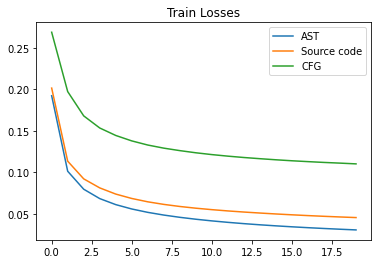

In [112]:

import matplotlib.pyplot as plt
plt.plot(list(range(0, len(loss_ast))), loss_ast, label='AST')
plt.plot(list(range(0, len(loss_sr))), loss_sr, label='Source code')
plt.plot(list(range(0, len(loss_cfg))), loss_cfg, label='CFG')
plt.legend()
plt.title('Train Losses')
plt.show()

In [62]:
num=[0,0,0,0,0,0,0,0,0,0]
print(labels[:10])
print(labels_cfg[:10])
for _, label in eval_data_cfg:
  num[label] = num[label]+1
print(num)


[0, 2, 9, 5, 1, 8, 1, 8, 1, 7]
[0, 2, 9, 5, 1, 8, 1, 8, 1, 7]
[196, 210, 204, 200, 189, 200, 189, 204, 202, 206]


In [111]:
correct_cfg=[0,0,0,0,0,0,0,0,0,0]
with torch.no_grad():
  pid=5000
  for program, label in eval_data_cfg:
    context_idx = get_cfg_context(program,edges_cfg[pid])
    pid = pid+1
    model_cfg.zero_grad()
    out = model_cfg(context_idx)
    #print(f'{out}:{label}')
    if(predict_label(out)==label):
      correct_cfg[label]= correct_cfg[label]+1
print(sum(correct_cfg)/len(eval_data_cfg))
for i in range(10):
  print(f'CFG_label{i}:Accuracy {correct_cfg[i]/num[i]}')

0.601
CFG_label0:Accuracy 0.5051020408163265
CFG_label1:Accuracy 0.5761904761904761
CFG_label2:Accuracy 0.5490196078431373
CFG_label3:Accuracy 0.555
CFG_label4:Accuracy 0.7037037037037037
CFG_label5:Accuracy 0.78
CFG_label6:Accuracy 0.544973544973545
CFG_label7:Accuracy 0.6617647058823529
CFG_label8:Accuracy 0.3564356435643564
CFG_label9:Accuracy 0.7766990291262136


In [96]:

correct_ast=[0,0,0,0,0,0,0,0,0,0]
predict_7=[]
with torch.no_grad():
  pid=5000
  for program, label in eval_data:
    context_idx = get_ast_context(program,edges[pid])
    pid = pid+1
    model_ast.zero_grad()
    out = model_ast(context_idx)
    #print(f'{out}:{label}')
    if(predict_label(out)==label):
      correct_ast[label]= correct_ast[label]+1
    #if(label==7):
      #print(f'{out}:{predict(out)}')
     # predict_7.append(predict(out))

print(sum(correct_ast)/len(eval_data))
for i in range(10):
  print(f'AST_label{i}:Accuracy {correct_ast[i]/num[i]}')
#print(predict_7)

0.8165
AST_label0:Accuracy 0.826530612244898
AST_label1:Accuracy 0.6666666666666666
AST_label2:Accuracy 0.7352941176470589
AST_label3:Accuracy 0.705
AST_label4:Accuracy 0.8571428571428571
AST_label5:Accuracy 0.94
AST_label6:Accuracy 0.656084656084656
AST_label7:Accuracy 0.8382352941176471
AST_label8:Accuracy 0.9801980198019802
AST_label9:Accuracy 0.9563106796116505


In [98]:

correct_sc=[0,0,0,0,0,0,0,0,0,0]
with torch.no_grad():
  pid=5000
  for program, label in eval_data:
    context_idx = get_source_context(program)
    pid = pid+1
    model_sc.zero_grad()
    out = model_sc(context_idx)
    #print(f'{out}:{label}')
    if(predict_label(out)==label):
      correct_sc[label]= correct_sc[label]+1
print(sum(correct_sc)/len(eval_data))
for i in range(10):
  print(f'SC_label{i}:Accuracy {correct_sc[i]/num[i]}')

0.7795
SC_label0:Accuracy 0.6479591836734694
SC_label1:Accuracy 0.5904761904761905
SC_label2:Accuracy 0.7401960784313726
SC_label3:Accuracy 0.625
SC_label4:Accuracy 0.8624338624338624
SC_label5:Accuracy 0.795
SC_label6:Accuracy 0.6613756613756614
SC_label7:Accuracy 0.946078431372549
SC_label8:Accuracy 0.995049504950495
SC_label9:Accuracy 0.9271844660194175
